In [1]:
from nozzle_design import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Optimization lower and upper bounds
lb = np.array([20e5, 0.5e-3, 0.5e-3, 10, 0.05, (300), 0.2])
ub = np.array([40e5, 3e-3, 3e-3, 60, 0.20, (273+40), 0.3])

# Running the optimization
x_opt, f_opt = optimize(lb, ub, 2)
T_min = f_opt

iteration 10: [2.00000000e+06 5.00000000e-04 5.00000000e-04 3.65159584e+01
 1.99416678e-01 3.04648416e+02 2.97950724e-01] [446.45991498]
Best after iteration 10: [2.00000000e+06 5.00000000e-04 5.00000000e-04 3.65159584e+01
 1.99416678e-01 3.04648416e+02 2.97950724e-01] [446.45991498]
New best for swarm at iteration 11: [2.00000000e+06 5.00000000e-04 5.00000000e-04 3.65720290e+01
 1.99975269e-01 3.04774175e+02 3.00000000e-01] [446.12265769]
New best for swarm at iteration 11: [2.00000000e+06 5.00000000e-04 5.00000000e-04 3.85220428e+01
 2.00000000e-01 3.04738329e+02 2.99427851e-01] [445.32902395]
New best for swarm at iteration 11: [2.00000000e+06 5.00000000e-04 5.00000000e-04 3.95164995e+01
 2.00000000e-01 3.05390872e+02 2.98942997e-01] [445.14049381]
Best after iteration 11: [2.00000000e+06 5.00000000e-04 5.00000000e-04 3.95164995e+01
 2.00000000e-01 3.05390872e+02 2.98942997e-01] [445.14049381]
New best for swarm at iteration 12: [2.00000000e+06 5.00000000e-04 5.00000000e-04 4.066993

In [4]:
%timeit objective_function([20e5, 0.5e-3, 0.5e-3, 10, 0.05, (300), 0.2])

534 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
HEOS = CP.AbstractState('HEOS', 'Ethanol&Water')
HEOS.set_mass_fractions([1-0.11, 0.11])

HEOS.update(CP.PT_INPUTS, 100000, 300)

ValueError: solver_rho_Tp was unable to find a solution for T=       300, p=    100000, with guess value    18764.4 with error: p is not a valid number

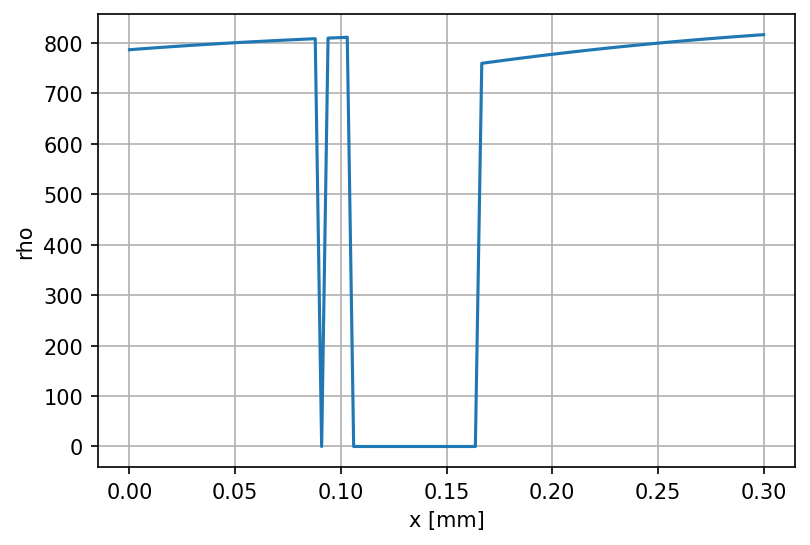

In [26]:
rho = []
x_vector = np.linspace(0, 0.3, 100)

for x in x_vector:
    try:
        HEOS = CP.AbstractState('HEOS', 'Water&Ethanol')
        HEOS.set_mass_fractions([x, 1-x])

        HEOS.update(CP.PT_INPUTS, 35e5, 300)
        rho.append(HEOS.rhomass())
    except: 
        rho.append(0)
        pass

plt.figure(dpi=150)
plt.plot(x_vector, rho)
plt.xlabel("x [mm]")
plt.ylabel("rho")
plt.grid(True)
plt.show()